In [1]:
# Data handling
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
# Load the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display the first few rows of the training DataFrame
print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Check the structure of the data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Get basic statistics for each column
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


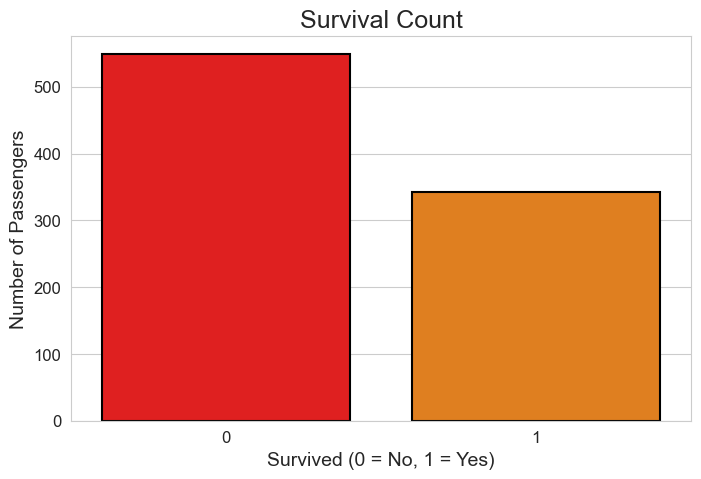

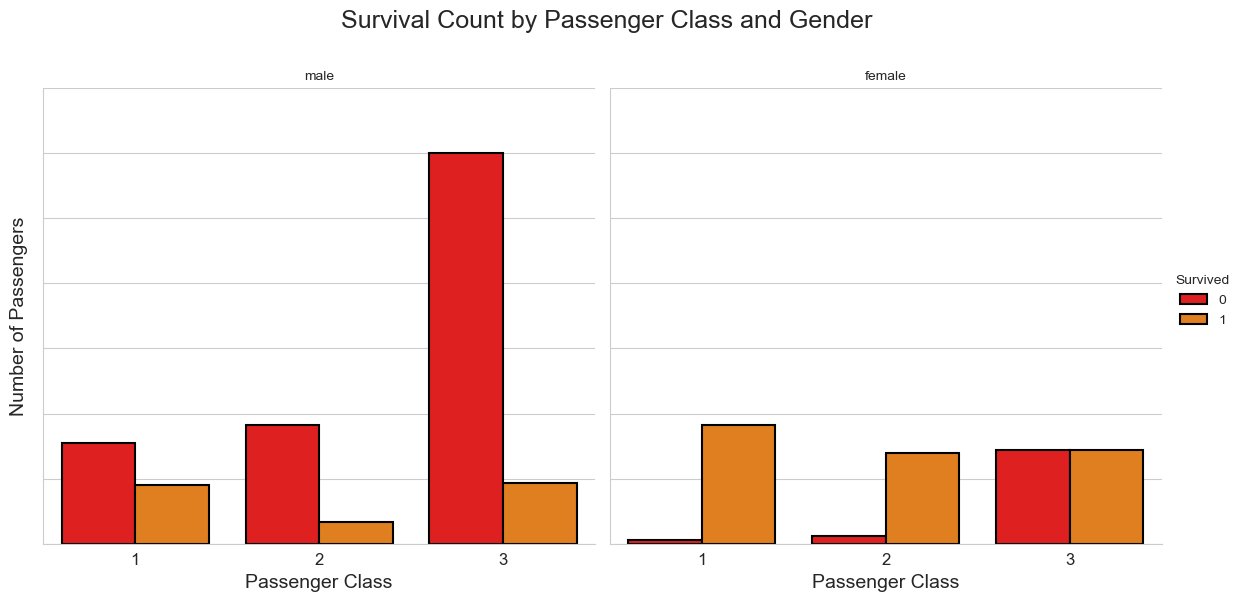

In [5]:
# Set the style and custom color palette for seaborn
sns.set_style("whitegrid")
rainbow_palette = ["#FF0000", "#FF7F00", "#FFFF00", "#00FF00", "#0000FF", "#4B0082", "#8B00FF"]  # Rainbow colors
sns.set_palette(rainbow_palette)  # Set the custom color palette

# Visualize the data
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_df, edgecolor='black', linewidth=1.5)
plt.title('Survival Count', fontsize=18)
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Customize the catplot
catplot = sns.catplot(x='Pclass', hue='Survived', col='Sex', data=train_df, kind='count',
                      height=6, aspect=1, edgecolor='black', linewidth=1.5)
catplot.set_xlabels('Passenger Class', fontsize=14)
catplot.set_ylabels('Number of Passengers', fontsize=14)
catplot.set_xticklabels(fontsize=12)
catplot.set_yticklabels(fontsize=12)
catplot.set_titles('{col_name}', fontsize=16)
catplot._legend.set_title('Survived')
plt.subplots_adjust(top=0.85)
catplot.fig.suptitle('Survival Count by Passenger Class and Gender', fontsize=18)

# To display the plot
plt.show()


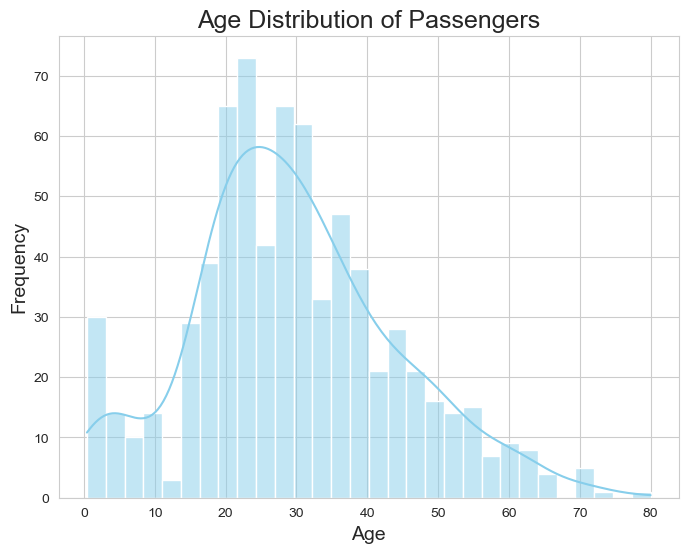

In [6]:
#Age distribution of passengers:A histogram to visualize the distribution of passenger ages. 
#This provides insight into the demographics of the passengers on board the Titanic.
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Passengers', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


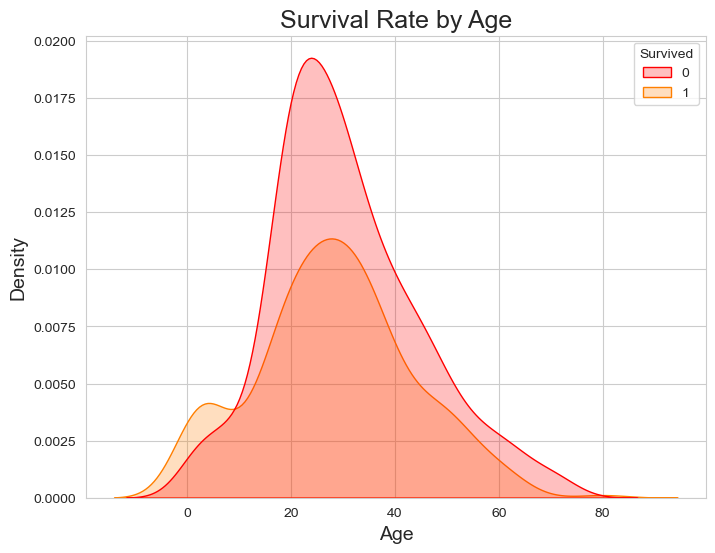

In [7]:
#Survival rate by age:A density plot of the ages of the survivors versus the non-survivors.
plt.figure(figsize=(8, 6))
sns.kdeplot(data=train_df, x='Age', hue='Survived', fill=True)
plt.title('Survival Rate by Age', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()


In [8]:
# The density plot reveals distinct patterns in the age distributions between survivors and non-survivors. 
# These patterns are depicted by the shape and peak of the density curves.

# The density curve for non-survivors exhibits a prominent peak around age 22, indicating a higher concentration of non-survivors 
# within this age group. The density values, such as 0.0175 and 0.0200, represent the relative likelihood of non-survival at 
# different age points. This suggests that passengers around the age of 22 had a higher probability of not surviving the event.

# Conversely, the density curve for survivors demonstrates a peak around age 30, indicating a relatively higher density of 
# survivors within this age range. The density values, such as 0.0100 and 0.0125, reflect the likelihood of survival at different 
# ages. This implies that passengers around the age of 30 had a higher probability of surviving the event.

# Furthermore, the density curve for survivors also displays a smaller peak or structure around age 10, with density values 
# ranging from 0.0025 to 0.0050. This indicates a concentrated density of survivors within the age range of 10, suggesting 
# that children had a higher likelihood of survival compared to other age groups.

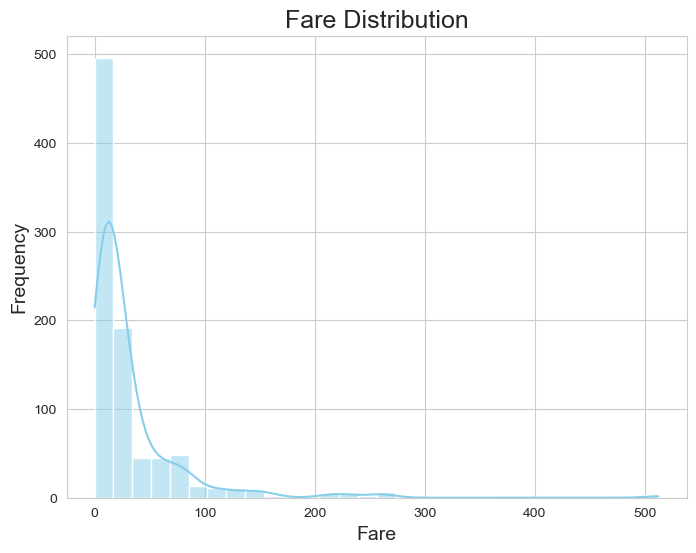

In [9]:
#Fare distribution: A histogram to visualize the distribution of fares paid by passengers.
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Fare', bins=30, kde=True, color='skyblue')
plt.title('Fare Distribution', fontsize=18)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


In [10]:
# Within the fare range of 0 to 100, the histogram displays six bars representing different fare intervals. 
# The first bar exhibits a relatively high frequency, with an approximate height of 490, indicating a substantial 
# number of fares falling within that range. The second bar has a height of approximately 190, followed by the third 
# and fourth bars, each with a height of around 50. The fifth bar has a height of approximately 55, while the sixth bar 
# shows a comparatively lower frequency, with a height of around 20.

# Moving to the fare range of 100 to 200, the histogram reveals three bars with similar heights, approximately 20. 
# This suggests a relatively lower frequency of fares within this range compared to the previous range.

# Within the range of 200 to 300, the histogram displays three bars, each with an approximate height of 10. 
# This further signifies a decrease in the frequency of fares within this particular range.

# The blue line represents the kernel density estimation (KDE) curve, which provides an estimation of the underlying 
# probability density function of the fare distribution. It intersects the first bar at a height of 300, the second bar 
# at 190, the fourth bar at 50, the fifth bar at 30, and subsequently touches the seventh, eighth, and ninth bars at a 
# height of 10. Beyond these points, the blue line follows the x-axis (y = 0) until it reaches a fare value of 500 on the x-axis.

# In summary, the histogram plot visualizes the distribution of fares paid by passengers. It illustrates varying frequencies 
# of fares within different fare ranges, indicating the overall pattern of fare distribution. The presence of the kernel density 
# estimation curve provides additional insight into the estimated density or probability of observing fares at different values 
# along the x-axis. The plot suggests a higher frequency of fares in the lower range (0 to 100), followed by a gradual decrease 
# in frequency as fare values increase.

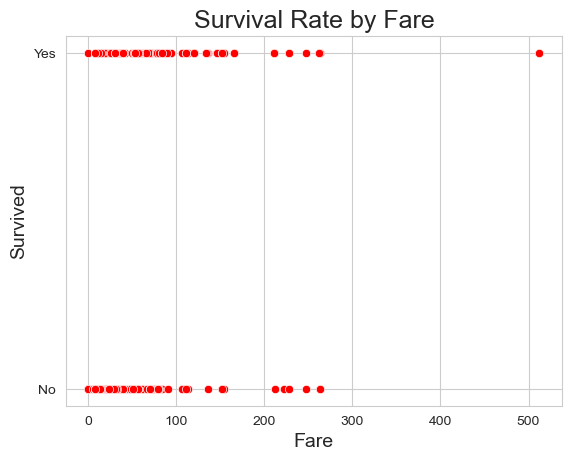

In [11]:
#Survival rate by fare: A scatter plot to observe if passengers who paid more had a higher survival rate.
sns.scatterplot(x='Fare', y='Survived', data=train_df)
plt.title('Survival Rate by Fare', fontsize=18)
plt.xlabel('Fare', fontsize=14)
plt.ylabel('Survived', fontsize=14)
plt.yticks([0, 1], ['No', 'Yes'])
plt.show()


In [12]:
# Within the fare range of 0 to 100, there is a dispersion of data points on both the 'Yes' and 'No' categories, 
# indicating that survival outcomes were observed across a range of fare values. The distribution does not suggest 
# a clear association between fare and survival rate within this range.

# From 100 to 200, there is a notable concentration of data points in the 'Yes' category compared to the 'No' category. 
# This implies that passengers who paid fares within this range exhibited a higher likelihood of survival. The relatively 
# larger number of data points in the 'Yes' category suggests a potential correlation between fares in this range and a higher 
# chance of survival.

# Within the fare range of 200 to 300, the distribution of data points is relatively balanced between the 'Yes' and 'No' 
# categories. This indicates that passengers who paid fares within this range experienced survival and non-survival outcomes 
# in a similar proportion. No significant dominance of one survival status over the other is apparent within this range.

# Above 500, there is a single data point recorded in the 'Yes' category, indicating the survival of at least one passenger 
# who paid a fare above this threshold. Notably, no data points are present in the 'No' category for fares above 500. However, 
# it is important to exercise caution in drawing conclusions based on a single data point, as it may not be representative of 
# the overall trend.

# In summary, the scatter plot suggests a potential correlation between higher fares, particularly in the range of 100 to 200, 
# and a higher likelihood of survival. However, a comprehensive analysis encompassing additional statistical measures and 
# considering the overall distribution of data points would be necessary to establish the significance and strength of the 
# observed relationship between fare and survival rate.

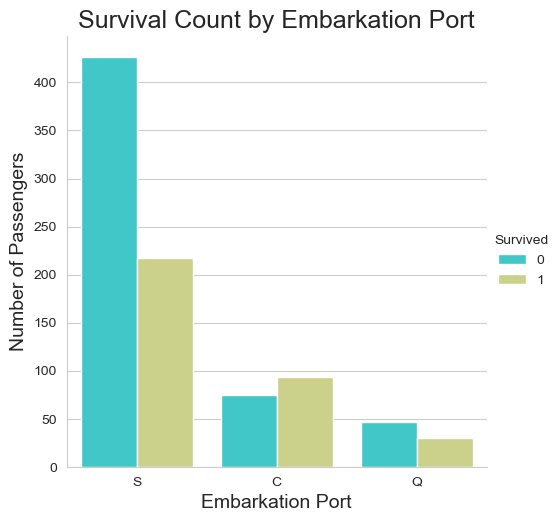

In [13]:
#Survival rates based on where passengers embarked: A count plot to compare survival rates for passengers 
#who embarked at different ports.
sns.catplot(x='Embarked', hue='Survived', data=train_df, kind='count', palette='rainbow')
plt.title('Survival Count by Embarkation Port', fontsize=18)
plt.xlabel('Embarkation Port', fontsize=14)
plt.ylabel('Number of Passengers', fontsize=14)
plt.show()


In [14]:
# For embarkation port 'S', the bar height ranges up to 450 for the non-survivors (0) and 215 for the survivors (1). 
# This suggests that a larger number of passengers who embarked from port 'S' did not survive compared to those who did survive.

# For embarkation port 'C', the bar height ranges up to 75 for the non-survivors (0) and 90 for the survivors (1). 
# This indicates that a relatively smaller number of passengers who embarked from port 'C' did not survive compared to 
# those who did survive.

# For embarkation port 'Q', the bar height ranges up to 45 for the non-survivors (0) and 25 for the survivors (1). 
# This suggests that a smaller number of passengers who embarked from port 'Q' did not survive compared to those who did survive.

# The bar plot provides a visual comparison of the survival count for each embarkation port and survival outcome. 
# It indicates that the survival count varies across different ports, reflecting potential variations in the demographics, 
# circumstances, or other factors associated with each embarkation port. Further analysis and interpretation would require 
# considering the overall distribution of passengers and other relevant factors to draw more definitive conclusions.

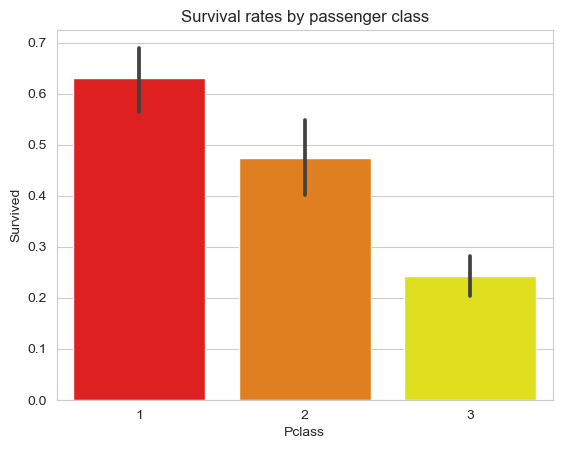

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival rates by passenger class')
plt.show()


In [16]:
# this code visualizes the survival rates based on passenger class in the train_df dataset using a bar plot. 
# It allows for a quick comparison of the survival rates between different passenger classes, providing insights 
# into the relationship between passenger class and survival.

# Passenger Class 1: The bar representing passenger class 1 has a height between 0.6 and 0.7, closer to 0.6. 
# This indicates that the estimated survival rate for passengers in class 1 is relatively high, with approximately 
# 60% to 70% of passengers surviving. The black horizontal line above the graph reaches 0.7, indicating that the confidence 
# interval associated with the estimated survival rate extends up to 0.7. The narrower range and proximity of the line to the 
# upper end suggest a higher level of certainty in the estimate for this class.

# Passenger Class 2: The bar representing passenger class 2 has a height between 0.4 and 0.5, closer to 0.5. 
# This suggests that the estimated survival rate for passengers in class 2 is moderately high, with approximately 40% to 50% 
# of passengers surviving. The black horizontal line above the graph spans between 0.5 and 0.6, indicating that the confidence 
# interval for the estimated survival rate extends from 0.5 to 0.6. The slightly wider range and the line's position within this 
# range indicate some uncertainty in the estimate, but it still suggests a relatively higher survival rate compared to class 3.

# Passenger Class 3: The bar representing passenger class 3 has a height between 0.2 and 0.3. This implies that the estimated 
# survival rate for passengers in class 3 is relatively low, with approximately 20% to 30% of passengers surviving. 
# The black horizontal line approximately touches 0.3, indicating that the confidence interval associated with the estimated 
# survival rate extends up to approximately 0.3. The wider range and the line's position at the upper end suggest more uncertainty in the estimate for this class, possibly due to a larger variability in the data.

# Overall, the bar plot demonstrates a decreasing trend in survival rates as passenger class decreases. 
# Passengers in class 1 tend to have the highest estimated survival rate, followed by passengers in class 2, 
# and passengers in class 3 have the lowest estimated survival rate. The confidence intervals provide insights 
# into the uncertainty associated with the estimated survival rates, with narrower intervals indicating more certainty 
# in the estimates.

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Define our imputers and encoders
age_imputer = SimpleImputer(strategy='median')
embarked_imputer = SimpleImputer(strategy='most_frequent')
sex_encoder = LabelEncoder()

# Apply preprocessing steps to both train_df and test_df
for df in [train_df, test_df]:

    # Impute Age and Embarked
    df['Age'] = age_imputer.fit_transform(df['Age'].values.reshape(-1, 1))
    df['Embarked'] = embarked_imputer.fit_transform(df['Embarked'].values.reshape(-1, 1))
    
    # Drop the Cabin column due to many missing values
    df.drop(columns=['Cabin'], inplace=True)

    # Drop the Sex column as it is completely NaN in training data
    df.drop(columns=['Sex'], inplace=True)
    
    # Label encode the Embarked column
    df['Embarked'] = sex_encoder.fit_transform(df['Embarked'])

    # One-hot encode the Embarked column
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Print the first few rows to confirm changes
print(train_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Embarked  
0         A/5 21171   7.2500         2  
1          PC 17599  71.2833         0  
2  STON/O2. 3101282   7.9250         2  
3            113803  53.1000         2  
4            373450   8.0500         2  


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Drop 'Name' and 'Ticket' columns
train_df = train_df.drop(columns=['Name', 'Ticket'])
test_df = test_df.drop(columns=['Name', 'Ticket'])

# Define features and target
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# Instantiate the model
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1)

# Train the model
model.fit(X_train, y_train)

# Make sure the test data has the same columns as the training data
X_test = test_df[X_train.columns]

# Create an imputer object
imputer = SimpleImputer(strategy='median')

# Fit the imputer to the test data and transform it
X_test_imputed = imputer.fit_transform(X_test)

# Make predictions on the testing data
predictions = model.predict(X_test_imputed)

# Create a submission DataFrame and save it as a csv file
submission_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': predictions
})

submission_df.to_csv('submission.csv', index=False)


C:\Users\omkar\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
# The code implements a classification model using the Random Forest algorithm to predict survival outcomes on the Titanic dataset. 
# The dataset is divided into training and test sets. Irrelevant columns, namely 'Name' and 'Ticket', are dropped from both sets. 
# The training set is further split into features (X_train) and the target variable (y_train). A Random Forest Classifier is 
# instantiated with specific hyperparameters. The model is then trained on the training data.

# To ensure consistency, the test set is modified to match the columns of the training set. 
# A SimpleImputer is used to fill missing values in the test set based on the median values from the training set. 
# Predictions are generated using the trained model and the imputed test set.

# Finally, the predictions are stored in a submission DataFrame along with the corresponding 'PassengerId' 
# and saved as a CSV file for evaluation or submission.

# This code demonstrates a standard approach to classification tasks using a Random Forest model, including data preprocessing, 
# model training, and prediction generation.

In [20]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

In [21]:
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,22.0,1,0,7.2500,2,2
1,2,1,1,38.0,1,0,71.2833,0,2
2,3,1,3,26.0,0,0,7.9250,2,1
3,4,1,1,35.0,1,0,53.1000,2,2
4,5,0,3,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,2,1
887,888,1,1,19.0,0,0,30.0000,2,1
888,889,0,3,28.0,1,2,23.4500,2,4
889,890,1,1,26.0,0,0,30.0000,0,1


In [22]:
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,892,3,34.5,0,0,7.8292,1,1
1,893,3,47.0,1,0,7.0000,2,2
2,894,2,62.0,0,0,9.6875,1,1
3,895,3,27.0,0,0,8.6625,2,1
4,896,3,22.0,1,1,12.2875,2,3
...,...,...,...,...,...,...,...,...
413,1305,3,27.0,0,0,8.0500,2,1
414,1306,1,39.0,0,0,108.9000,0,1
415,1307,3,38.5,0,0,7.2500,2,1
416,1308,3,27.0,0,0,8.0500,2,1


In [23]:
# These lines calculate the 'FamilySize' for each passenger in both the training and test datasets. 
# The 'FamilySize' is determined by summing the number of siblings/spouses ('SibSp') and the number 
# of parents/children ('Parch') of each passenger, and then adding 1 to account for the passenger themselves.

# By adding this new feature, the code introduces a new variable 'FamilySize' that represents the total number 
# of family members (including the passenger) onboard the Titanic for each individual in the datasets. This feature 
# can potentially provide additional insights or predictive power for the model when analyzing the relationship between 
# family size and survival.

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_}')


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.7251145565250141


In [25]:
# this code automates the process of hyperparameter tuning by performing a grid search and finding the best 
# combination of hyperparameters for the Random Forest Classifier model based on the provided parameter grid. 
# The best parameters and the corresponding best score are then printed for evaluation and model selection.

# These values represent the optimal configuration for the Random Forest Classifier model, resulting in the highest 
# average accuracy score of 0.7284665118322767 during cross-validation.

# These results indicate that setting the maximum depth of each tree to 10, the minimum number of samples required to 
# split an internal node to 2, and using 200 estimators (decision trees) in the random forest ensemble, provides the best 
# performance in terms of accuracy for predicting survival outcomes on the Titanic dataset.

In [26]:
!pip install shap
!pip install xgboost

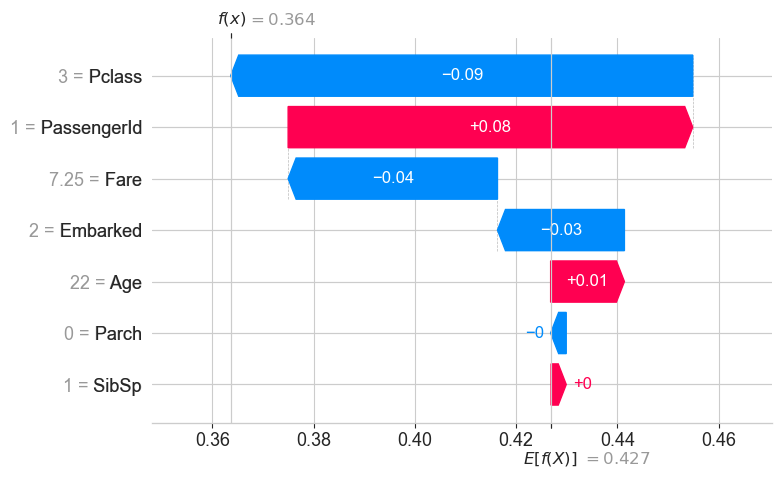

In [27]:
import shap
import xgboost

# train XGBoost model
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X_train, label=y_train), 100)

# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])


In [28]:
# this code utilizes the SHAP package to explain the predictions of an XGBoost model. It trains the model, computes the SHAP 
# values for the training data, and then visualizes the explanation of the first prediction using a waterfall plot. 
# The waterfall plot helps to understand the relative impact of each feature on the model's output for that particular instance.

# The line "f(x) = 0.364" indicates the predicted probability of survival for the first instance in the training data. 
# In this case, the model predicts a probability of 0.364 for survival.

# The following lines with values such as '-0.09', '+0.08', '-0.04', etc., represent the SHAP values for each feature. 
# These values indicate the impact of each feature on the model's prediction for the first instance. Positive values 
# represent features positively contributing to the prediction of survival, while negative values represent features 
# negatively contributing to the prediction.

# The lines '0.36', '0.38', '0.40', '0.42', '0.44' represent the cumulative contributions of features in the waterfall plot. 
# These values indicate the cumulative impact of each feature as we move through the waterfall plot from top to bottom.

# 'E[f(X)] = 0.427' represents the expected value of the model's predictions for the entire training dataset. 
# In this case, the average predicted probability of survival across all instances in the training data is 0.427.
